# Understanding the Housing Market in Kings County, WA

![house](images/house.jpg)

## Author: [Patricio Contreras](https://www.linkedin.com/in/pcontreras97/)

## Overview

This project is concerned in providing data-driven insights of the current housing market in King County, WA.  The first half will focus on exploratory analysis such as descriptive statistics and visualisations in order to understand the data and get a good read of the market.  The second half utilises what is learnt and uses regression modelling to assist real estate agents and prospective house owners predict future house prices.

## 1. Business Understanding

Up and coming real estate agent Franklin Bluth is ready to get out there and start selling houses!  However, before doing that, Franklin believes that in order to become the best real estate agent in Washington State, a thorough analysis of the current housing market is in need.  He thinks exploratory analysis isn't enough to gain a major advantage over everyone else and therefore would also like to develop a model to predict housing prices based on existing features. 

## 2. Data Understanding

This step of the project is concerned with gaining a solid understanding of the data.  Here we'll get to know our dataset, where it comes from, calculate some statistics, and check for any irregularities.  By the end of this step, we'll know what fixes need to be made to supply clean and relevant data to our model.

In [1]:
# importing Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This project uses the King County House Sales dataset found in the [`data`](data) folder.  It includes home sold between May 2014 and May 2015:

In [2]:
# reading in the csv file and displaying first 5 rows
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


As seen above, the data frame has information on house sales such as number of bedrooms, number of bathrooms, square footage, selling price, etc.

In [3]:
print("This dataset has", df.shape[0], "rows and", df.shape[1], "columns!")

This dataset has 21597 rows and 21 columns!


In order to understand what each column in our data frame represents, a data dictionary is displayed below:

**TARGET/DEPENDENT VARIABLE:**

* **price** - price of each home sold

**PREDICTORS/INDEPENDENT VARIABLES:**

* **id** - unique identifier for a house
* **date** - date of the home sale
* **bedrooms** -  number of bedrooms
* **bathrooms** -  number of bathrooms
* **sqft_living** -  square footage of the house's interior living space
* **sqft_lot** -  square footage of the land space
* **floors** -  number of floors
* **waterfront** - does the house have a view to the waterfront?
* **view** - an index from 0 to 4 of how good the view of the property was
* **condition** - an index from 1 to 5 on the condition of the house
* **grade** - an index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
* **sqft_above** - square feet above ground
* **sqft_basement** - square feet below ground
* **yr_built** - the year the house was initially built
* **yr_renovated** - the year of the house's last renovation (0 if never renovated)
* **zipcode** - zip
* **lat** - latitude coordinate
* **long** - longitude coordinate
* **sqft_living15** - average size of interior housing living space for the closest 15 houses, in square feet
* **sqft_lot15** - average size of land lot for the closest 15 houses, in square feet

It is also important to know the data type of each column to get a sense of its nature (continuous vs. categorical):

In [4]:
# displaying data type per column
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

The output above confirms most expected data types such as `bedrooms` and `condition` being discrete integers, however, some columns have unexpected data types (`date` - object, `sqft_basement` - object, `yr_renovated` - float64).

### 2.a - Descriptive Statistics of the Data

A good rule of thumb is to calculate descriptive statistics from our variables to get to know our data even better.  Even though most of these will be seen in visualisations later on, here is a table format of it:

In [5]:
# descriptive statistics of all variables
df.describe(include = "all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,...,21597.000000,21597.000000,21597,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580474e+09,NaN,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,...,7.657915,1788.596842,NaN,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,...,1.173200,827.759761,NaN,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,NaN,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,3.000000,370.000000,NaN,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,NaN,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,NaN,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,NaN,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


The output above shows statistics that we've probably expected, such as an average house having 2 bathrooms or the most recent house being built in 2015.  However, there is cause for concern with some variables (the max number of bedrooms in a house is 33?  The earliest renovation was done in year 0?)

### 2.b - Check for Missing Values

Missing values are often times problematic and should always be checked when reviewing a dataset:

In [6]:
# percentage of missing values per column
(df.isna().sum() / len(df)) * 100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

Unfortunately, `waterfront`, `view`, and `yr_renovated` have missing values.  If we decide to use these variables in the predictive model, we'll have to do something about their missing values.

### 2.c - Check for Duplicates

Duplicates are also problematic and are far more subtle than missing values.  Given that a single house could've been sold at different points in time, **we'll define a duplicate as any row that has the same `id` and `date` as any other row in the dataset.**

In [7]:
# check if the number of duplicates is 0
df.duplicated(subset = ["id", "date"]).sum() == 0

True

This is great news!  Nothing to worry here.

### 2.d - Check for Extreme or Irrelevant Values

Extreme and irrelevant values are also worth checking since they may affect our model down the line.  Extreme values could be outliers or another way to express missing data (9999 is often one of them).  They are easily spotted since they fall at the very beginning or end of the respective distribution.  Irrelevant values are a cause for concern since they shouldn't even be included in the data (e.g., "?" in a numeric column, 42 in a string column, etc.)  These are more difficult to detect since they may be hidden in a large pool of data.

An easy way to check for extreme values is to display the distribution of the data and check the endpoints.  Doing this also allows us gain a better understanding of the nature of each variable.  This is done below:

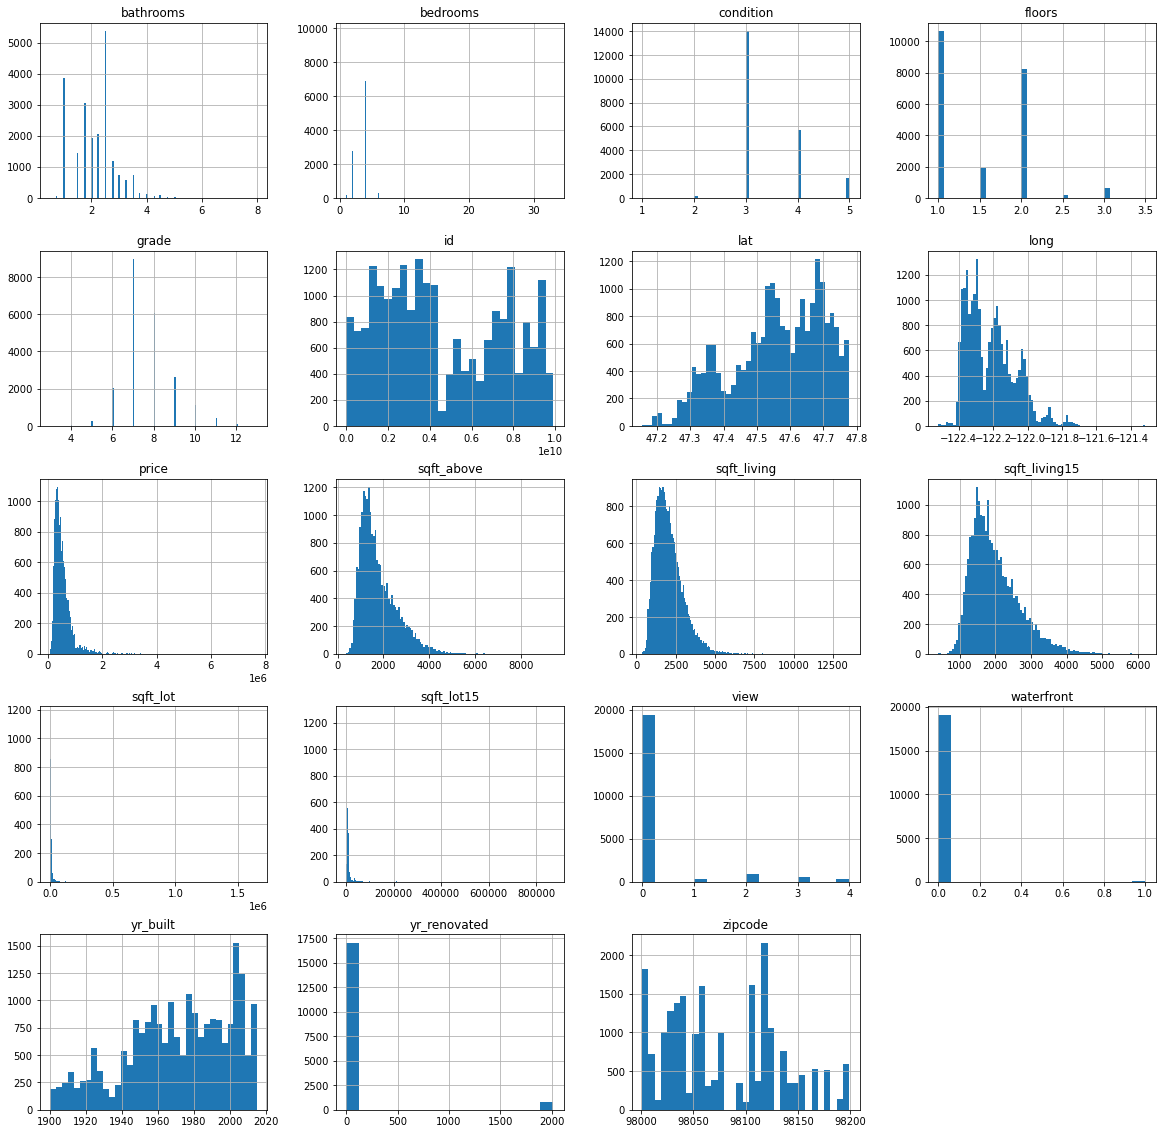

In [8]:
# histogram of each numerical feature
df.hist(bins = "auto", figsize = (20,20));

The output shown above mostly helps us understand the shape, skewness, and modality of each distribution.  Several features such as `price`, `yr_built`, and `sqft_living` are skewed and unimodal.  These distributions also shine a light on which variables could be considered categorical and which are definitely continuous (discrete bars vs. semi-smooth shapes).

To truly visualise potential outliers (extreme values), a boxplot is more appropriate:

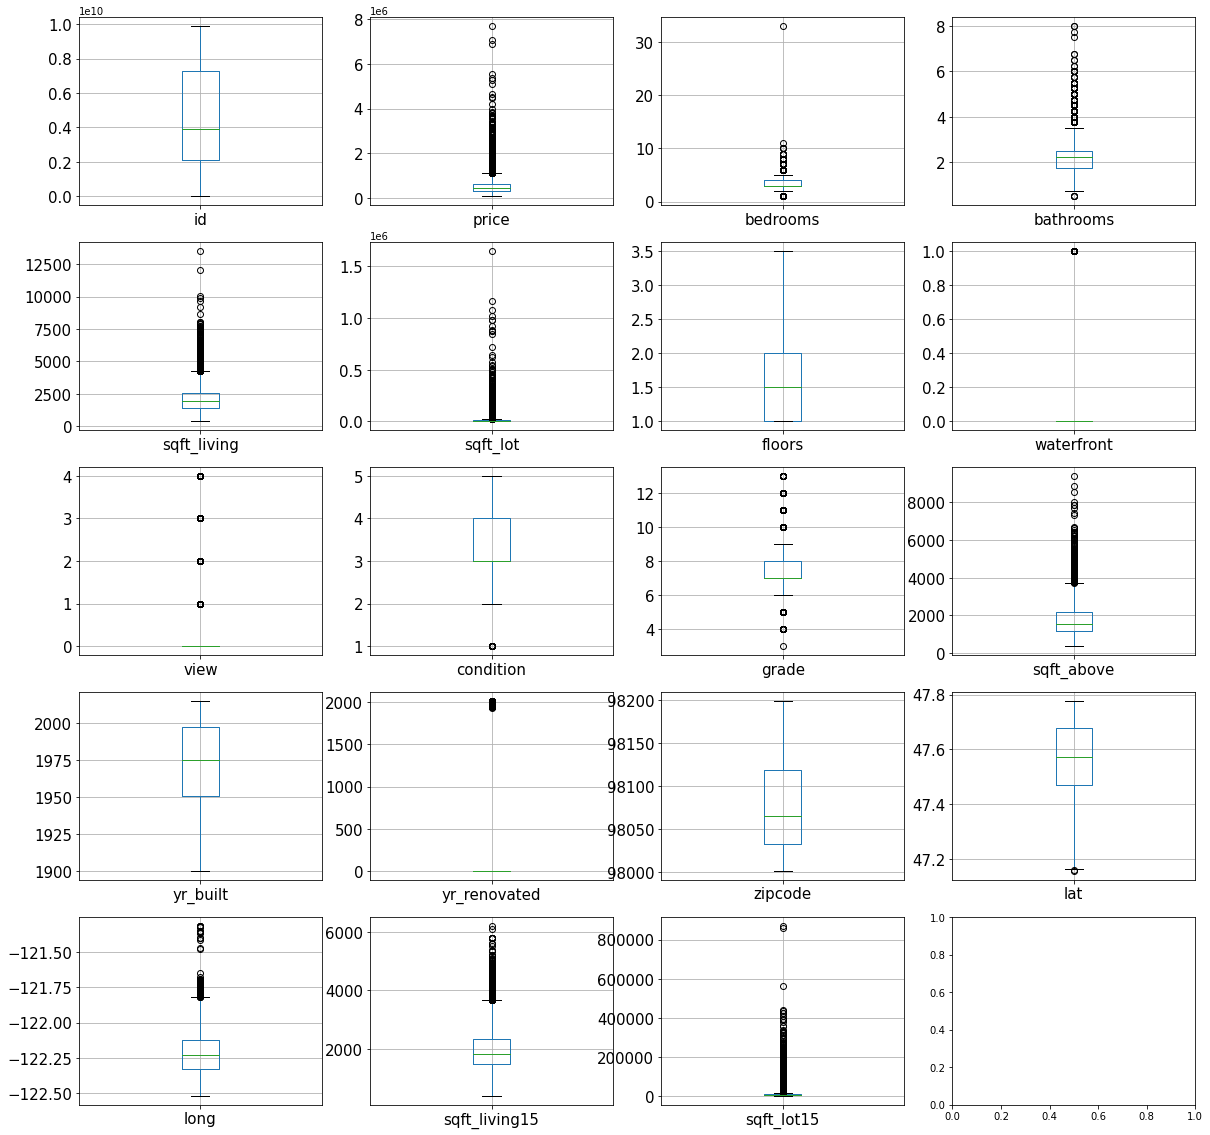

In [9]:
# only visualising boxplots of non-string variables
not_object = df.select_dtypes(exclude = np.object).columns

fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (20,20))
# counter
index = 0
for row in range(len(axes)):
    for col in range(len(axes[row])):
        if index == len(not_object):
            break
        ax = axes[row][col]
        var = df[[not_object[index]]]
        var.boxplot(fontsize = 15, ax = ax)
        index += 1
#plt.savefig("./images/boxplots.png", dpi = 150, bbox_inches = "tight")

Most of the boxplots displayed above show possible outliers.  While some boxplots do this accurately (there's a house with 33 bedrooms!), others report "outliers" that make rather logical sense (houses renovated in the year 2000 or a house having a condition rating of 1).

Checking for irrelevant values is somewhat complicated.  What we'll do is first check if all the "numeric" columns (ints or floats) can be coerced into an `int` data type.  If all these columns *truly* have numeric values, there shouldn't be any errors while doing this check:

In [10]:
# list containing all irrelevant values
incorrect_nums = []
# not_object is list of all numeric columns
for col in not_object:
    for val in df[col].dropna():
        try:
            int(val)
        except:
            # append val that couldn't be coerced to int
            incorrect_nums.append(val)

print("There is/are", len(incorrect_nums), "erroneous values in our numeric columns.")

There is/are 0 erroneous values in our numeric columns.


That's good news!  This is a strong indication that there don't exist erroneous values in our numeric columns.

The check for non-numeric columns is easier since there are only 2 of them (`date` and `sqft_basement`).  We'll try to coerce `date` from a string to a datetime object and `sqft_basement` into a float (their appropriate data types):

In [11]:
incorrect_dates = []
for val in df.date:
    try:
        pd.to_datetime(val)
    except:
        incorrect_dates.append(val)

incorrect_sqfts = []
for val in df.sqft_basement:
    try:
        float(val)
    except:
        incorrect_sqfts.append(val)

print("There is/are", len(incorrect_dates), "erroneous values in the date column.")
print("There is/are", len(incorrect_sqfts), "erroneous value(s) in the sqft_basement column.")

There is/are 0 erroneous values in the date column.
There is/are 454 erroneous value(s) in the sqft_basement column.


Uh oh, there seems to be irrelevant values in the `sqft_basement` column.  Let's check out what they are:

In [12]:
# unique irrelevant values
set(incorrect_sqfts)

{'?'}

The `sqft_basement` column has an irrelevant/incorrect value.  "?" appears 454 times (2.1% of the time).

### 2.e - Visualising the Relationships between Variables

Before cleaning the data, let's see the relationship between some variables with `price`.  This will help us get a better sense as to which variables should be included in the model and which variables we should probably leave out:

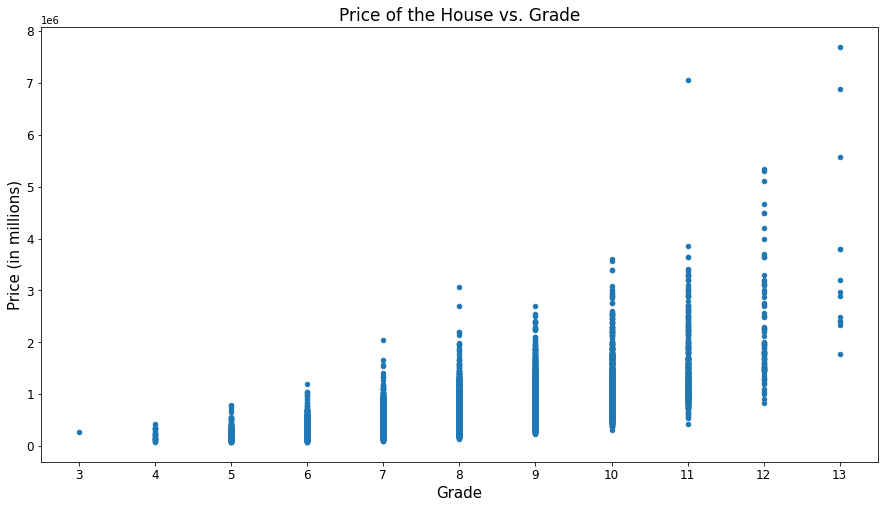

In [13]:
df.plot.scatter(x = "grade", y = "price", figsize = (15,8))
plt.title("Price of the House vs. Grade", size = 17)
plt.xlabel("Grade", size = 15)
plt.ylabel("Price (in millions)", size = 15)
plt.xticks(np.arange(3,14), size = 12)
plt.yticks(size = 12);

#plt.savefig("./images/price_grade.png", dpi = 150, bbox_inches = "tight")

There's a clear positive relationship between `grade` and `price`.  As we increase `grade`, `price` tends to increase too.

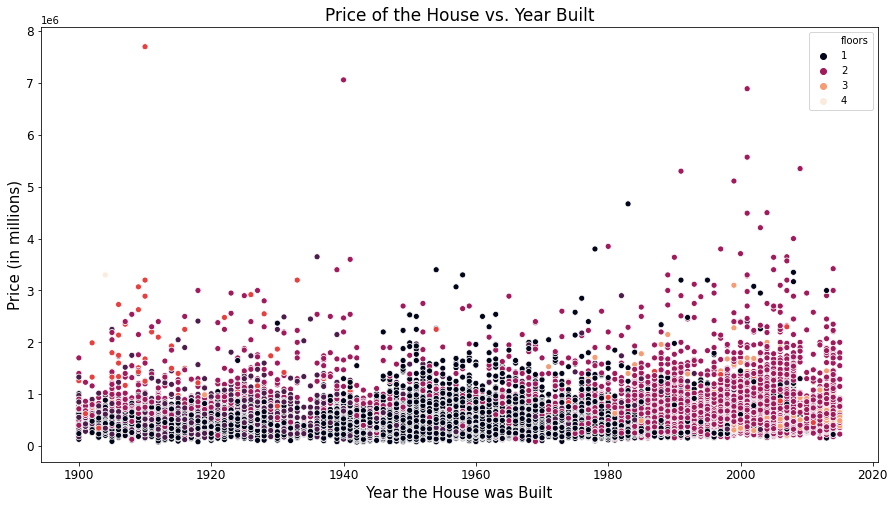

In [14]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "yr_built", y = "price", hue = "floors", palette = "rocket", data = df)
plt.title("Price of the House vs. Year Built", size = 17)
plt.xlabel("Year the House was Built", size = 15)
plt.ylabel("Price (in millions)", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12);

#plt.savefig("./images/price_yrbuilt.png", dpi = 150, bbox_inches = "tight")

The plot above suggests that there isn't really a strong relationship between the year the house was built and price.  We don't really see a positive (or negative) trend anywhere.  Furthermore, the number of floors a house has doesn't seem to be related with the year the house was built (most houses have 1 or 2 floors).

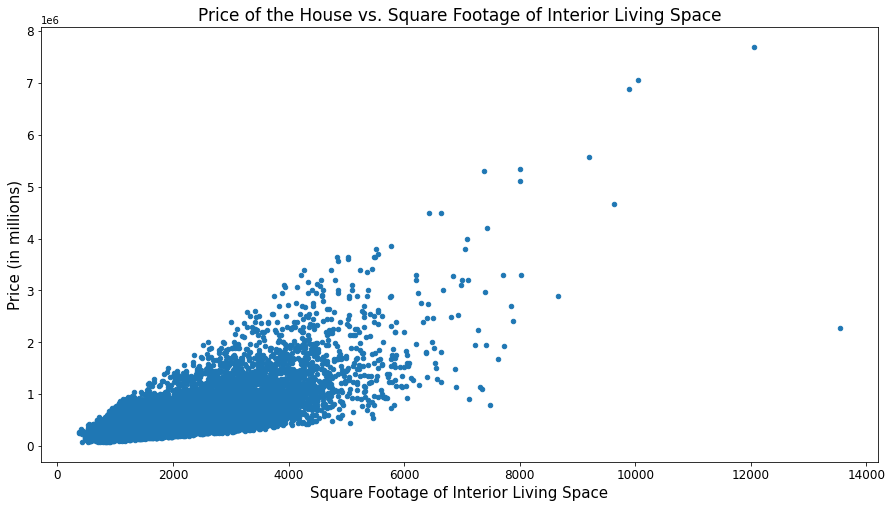

In [15]:
df.plot.scatter(x = "sqft_living", y = "price", figsize = (15,8))
plt.title("Price of the House vs. Square Footage of Interior Living Space", size = 17)
plt.xlabel("Square Footage of Interior Living Space", size = 15)
plt.ylabel("Price (in millions)", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12);

#plt.savefig("./images/price_sqftliving.png", dpi = 150, bbox_inches = "tight")

As expected, increasing the square footage of the interior living space seems to increase the price of the house as well.  The plot above suggests that `sqft_living` and `price` have a *strong* positive relationship.

Now that we've visualised a couple variable-response relationships, we can handle the issues we encountered and prepare the data for modeling:

## 3. Data Preparation

Having explored the data and gained a solid understanding of it, now it's time to prepare our data for our modeling step!

### 3.a - Fixing Missing Values

As mentioned in section 2.b, `waterfront`, `view`, and `yr_renovated` are the only columns with missing values.  Section 2.d's distributions suggest `waterfront` is a binary variable (0,1), `view` is a discrete variable with most values falling under 0, and `yr_renovated` also has most of its values fall under 0.  To verify this, we'll output the most common values for each variable along with its percent frequency:

In [16]:
# iterate over each column and print most common values
for col in ["waterfront", "view", "yr_renovated"]:
    print(col)
    print(df[col].value_counts(normalize = True).sort_values(ascending = False).head())
    print("------------------")

waterfront
0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64
------------------
view
0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64
------------------
yr_renovated
0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
Name: yr_renovated, dtype: float64
------------------


The results shown above clearly show that 0 is the most common value for all three columns!  In order to retain as much data as possible, we'll fill the missing values of each column by randomly choosing a unique value given the appropriate weights.  For example, a missing value in the `waterfront` column will be replaced by 0 with a 99% chance and 1 with a 1% chance.

In [17]:
def replace_missing(val, probs):
    if np.isnan(val):
        return np.random.choice(probs.index, p = probs)
    else:
        return val

for col in ["waterfront", "view", "yr_renovated"]:
    # get weights of unique values
    unique_p = df[col].value_counts(normalize = True)
    # apply function above
    df[col] = df[col].apply(replace_missing, args = (unique_p,))
    print("The number of missing values in {} is:".format(col), df[col].isna().sum())

print("--------------------------------------")
print("Missing values per column:")
# last check to see if there are missing values
df.isna().sum()

The number of missing values in waterfront is: 0
The number of missing values in view is: 0
The number of missing values in yr_renovated is: 0
--------------------------------------
Missing values per column:


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Great!  No more missing values and we retained all data we started off with!

### 3.b - Fix Extreme and Irrelevant Values

It is clear by looking at section 2.d's boxplots that most variables have outliers.  Therefore knowing when to get rid of them or leaving them as "reasonable" data points could seem quite hard.  In some cases, log-transforming the variable could fix the problem.  In other cases, we might not even wish to log-transform the variable and would therefore need to remove as many outliers as we can.  In sum, this is a pretty subjective part and really depends on the nature of the variable being dealt with.

For this section, I mostly refer to the boxplots and histograms in 2.d.  If I think a variable could be log-transformed later on, I get rid of the most "extreme" outliers (since log-transforming the variable will probably fix the remaining outliers).  If I think a variable shouldn't be log-transformed (in order to "save" its interpretability), I get rid of most of the outliers:

In [18]:
# removing records that exceed "extreme" values:
# log-transforming price could fix remaining outliers
df = df[df.price < 5000000]
# probably don't want to log-transform this variable.
# try to keep most "reasonable" data
df = df[df.bedrooms < 6]
df = df[df.bathrooms < 4]
# log-transforming variable could fix remaining outliers
df = df[df.sqft_living < 10000]
df = df[df.sqft_lot < 800000]
df = df[df.sqft_above < 7000]
# can't log-transform variable
# try to get rid of most outliers
df = df[df.long < -121.8]
# probably good idea to log-transform these variables
df = df[df.sqft_living15 < 5000]
df = df[df.sqft_lot15 < 300000]

pct_diff = ((21597 - df.shape[0])/21597)*100

print("We now have", df.shape[0], "rows ({}% less than at the beginning)".format(round(pct_diff, 2)))

We now have 20667 rows (4.31% less than at the beginning)


Now that we got rid of those humongous outliers, we have to make a decision about `sqft_basement`.  Given that "?" occurs only 2.1% of the time, we can replace it with the most common value (the mode):

In [19]:
# replacing ? with mode
mode = df.sqft_basement.value_counts().sort_values(ascending = False).index[0]

df.sqft_basement = df.sqft_basement.str.replace("?", mode)
# check
print("The number of times '?' occurs in sqft_basement is:", (df.sqft_basement == "?").sum())

The number of times '?' occurs in sqft_basement is: 0


Great!  We're now clear of all missing values, outliers, and irrelevant values.

### 3.c - Convert Columns to Correct Data Types

Recall the data type of each column:

In [20]:
# displaying data types per column again
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

While some make sense (e.g., `price` = float, `bedrooms` = int, etc.), there are other columns that need to be converted to a different data type.  We'll do that in this step:

In [21]:
# converting columns to appropriate data type!
df.date = pd.to_datetime(df.date)
# I've decided to use the ceiling function for variables that 
# are discrete by nature but are floats
df.bathrooms = np.ceil(df.bathrooms).astype(int)
df.floors = np.ceil(df.floors).astype(int)
df.waterfront = df.waterfront.astype(int)
df.view = df.view.astype(int)
# cannot convert float string to int directly
df.sqft_basement = df.sqft_basement.astype(float).astype(int)
df.yr_renovated = df.yr_renovated.astype(int)

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

We finally have all columns with their right data type!  Now to apply some transformations!

### 3.d - Data Transformations

Recall how some distributions in section 2.d. (e.g., `price`, `yr_built`, and `sqft_living`) were skewed.  In order to improve the performance of our model later on, it's generally a good idea to transform these variables to resemble normal distributions.  One way of doing this is by log-transforming the variable:

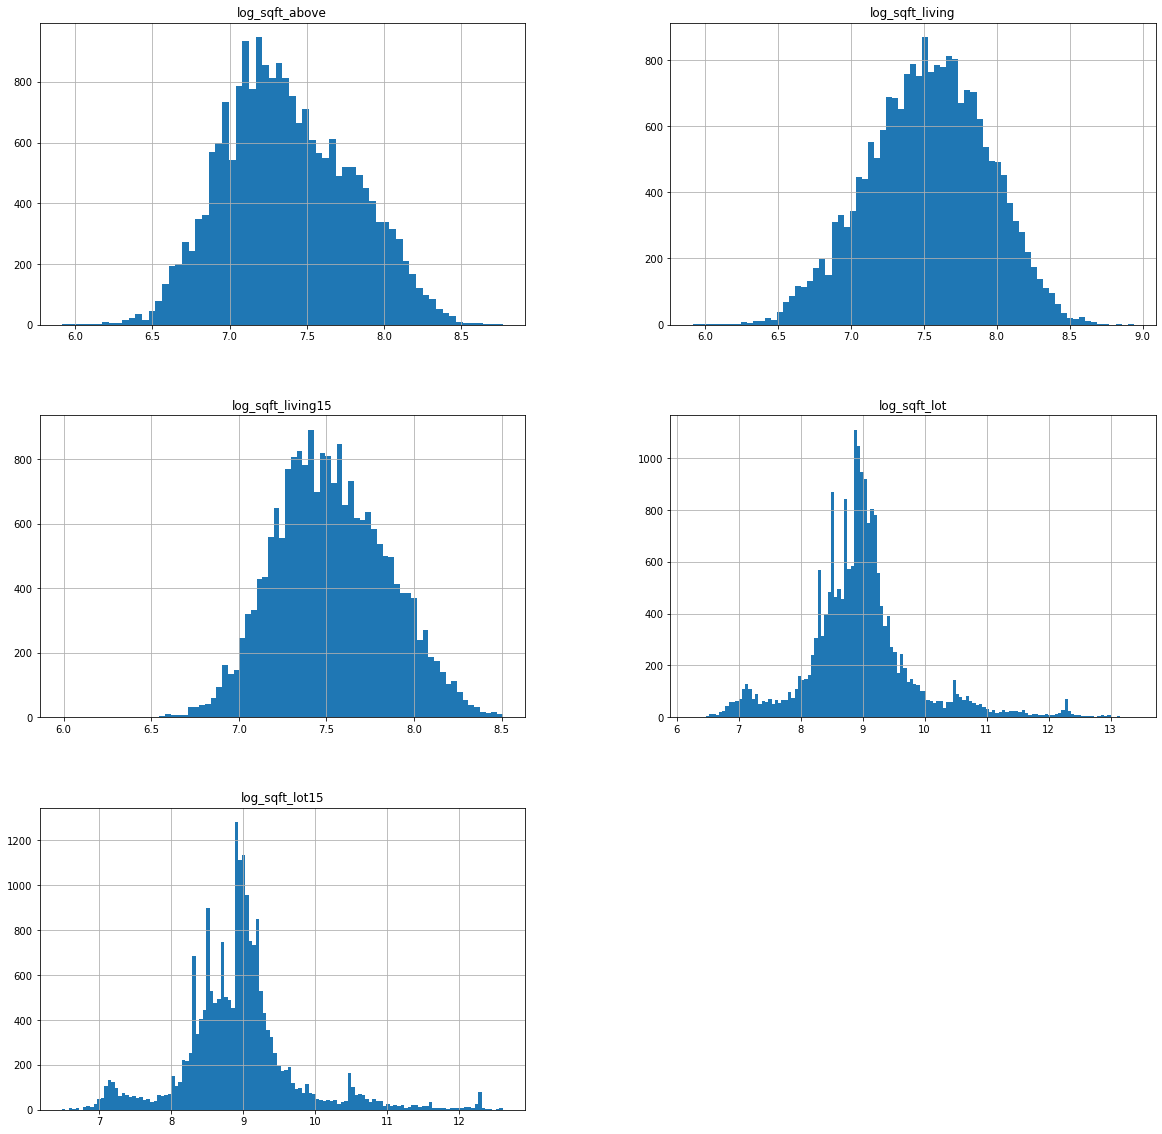

In [22]:
# reason for this will be seen later
df_transformed = df.copy()
# new variable names
log_vars = ["log_sqft_above", "log_sqft_living", "log_sqft_lot", 
            "log_sqft_living15", "log_sqft_lot15"]
# log-transforming chosen variables
df_transformed[log_vars] = np.log(df_transformed[["sqft_above", "sqft_living", "sqft_lot",
                                                 "sqft_living15", "sqft_lot15"]])
# dropping un-transformed variables
df_transformed.drop(["sqft_above", "sqft_living", "sqft_lot", 
                     "sqft_living15", "sqft_lot15"], axis = 1, inplace = True)

df_transformed[log_vars].hist(bins = "auto", figsize = (20,20));
#plt.savefig("./images/transformations.png", dpi = 150, bbox_inches = "tight")

As seen by the output above, the distributions of our predictor variables have now changed to resemble more of a normal distribution (symmetrical, unimodal, "bell-shaped").  This is good news as it'll help our model performance in a later section.

In [23]:
# save data frames for use in Part 2!
df.to_csv("data/P1_df.csv", index = False)
df_transformed.to_csv("data/P1_df_transformed.csv", index = False)

That'll be all *for now*.  Our data is reasonably clean and is now ready to be used to fit a model!  To continue on with this project, please click [here](P2_HousingProject.ipynb)!

----------